# Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Read dataset

In [2]:
df = pd.read_csv('dataset/data_merged.csv')
mean_popularity = 42
df["popularity"] = [ 1 if i >= mean_popularity else 0 for i in df.popularity ]

In [3]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,0,0.0707,...,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,0,0.0337,...,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.443625,3.419500,1,1,0,0,0,0,0,0


## Split train and test data

In [5]:
X  = df.drop(['popularity', 'mode'], axis=1)
y = df['popularity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [7]:
X_train.shape, X_test.shape

((137784, 70), (34446, 70))

## Grid Search

In [10]:
criterion = ['gini', 'entropy']
# max_depth = [2,5,10,15]
# min_samples_split = [2,3,4,6,10,15]

# max_depth = [10,12,15]
# min_samples_split = [6,10,15]

# max_depth = [8,10,12]
# min_samples_split = [8,10,12]
# min_samples_leaf=[1,2,3,4]

max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]

In [11]:
parameters = dict(max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf)

In [12]:
tree_clf = DecisionTreeClassifier()
# tree_clf.fit(X_train,y_train)

In [13]:
tree_clf_gs = GridSearchCV(tree_clf, parameters)
tree_clf_gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 10, 12]})

## Best parameters

In [14]:
# print('Best Criterion:', tree_clf_gs.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree_clf_gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', tree_clf_gs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', tree_clf_gs.best_estimator_.get_params()['min_samples_leaf'])
# print(); 
# print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best max_depth: 8
Best min_samples_split: 12
Best min_samples_leaf: 4


In [15]:
X_train.columns[2]

'duration_ms'

In [8]:
%%time
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1,
                               min_samples_split=12)
tree_clf.fit(X_train,y_train)

from joblib import dump
dump(tree_clf, 'Saved models/mlspotify_DT')

CPU times: user 374 ms, sys: 88 ms, total: 462 ms
Wall time: 473 ms


['Saved models/mlspotify_DT']

## Results

In [9]:
y_pred = tree_clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.8514486442547756

In [11]:
y_pred_train = tree_clf.predict(X_train)

In [12]:
accuracy_score(y_pred_train, y_train)

0.8573201532834

In [53]:
print(tree_clf.tree_.max_depth)

41


In [13]:
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[23208  2218]
 [ 2899  6121]]
Classification report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     25426
           1       0.73      0.68      0.71      9020

    accuracy                           0.85     34446
   macro avg       0.81      0.80      0.80     34446
weighted avg       0.85      0.85      0.85     34446



## Plotting Graphs

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.900047860728137

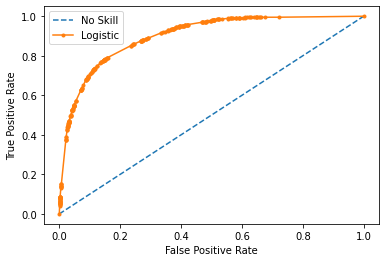

In [16]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
np.save("fpr_DT", fpr)
np.save("tpr_DT", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.705 auc=0.765
0.261859141845207


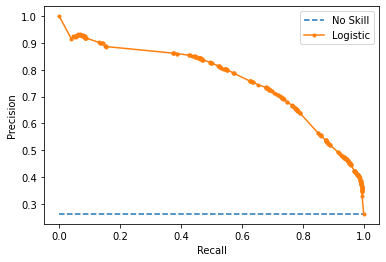

In [17]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_probs)
np.save("lrp_DT", lr_precision)
np.save("lrr_DT", lr_recall)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()